# Air Crash Data
In this Notebook we will explore the airplane crash data since 1908.



## 1. Importing Liberaries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("aircrash1908-2008.csv")

In [3]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,09/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,07/12/1912 06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,09/09/1913 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
df.shape

(5268, 13)

In [5]:
df.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [6]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [7]:
df["Date"]=pd.to_datetime(df["Date"])
df["Date"].head()

0   1908-09-17
1   1912-07-12
2   1913-08-06
3   1913-09-09
4   1913-10-17
Name: Date, dtype: datetime64[ns]

In [8]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Year'].head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

In [9]:
df.drop(['cn/In','Flight #','Registration','Route'],axis=1,inplace=True)

In [10]:
df["Fatalities"].fillna(0,inplace=True)
df["Ground"].fillna(0,inplace=True)
df["Aboard"].fillna(0,inplace=True)

In [11]:
df.head()

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,09/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,07/12/1912 06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,09/09/1913 18:30,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913


## Visualization

In [12]:
crashes_per_year=df[['Year','Date']].groupby('Year').count()
crashes_per_year=crashes_per_year.reset_index()
crashes_per_year.columns=['Year','Crashes']
crashes_per_year.head()

,Year,Crashes
0,1908,1
1,1912,1
2,1913,3
3,1915,2
4,1916,5


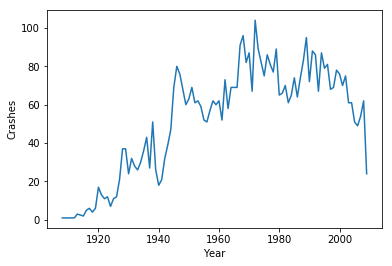

In [13]:
sns.lineplot(x='Year',y='Crashes',data=crashes_per_year)


Firstly we will visualize the no. of deaths per year using the line plot. For this we will need the fatalities and year columns from the dataframe. we will them as follows.

In [14]:
Fatalities_per_year=df[['Year','Fatalities']].groupby('Year').sum()
Fatalities_per_year=Fatalities_per_year.reset_index()
Fatalities_per_year.columns=['Year','Fatalities']
Fatalities_per_year.head()


,Year,Fatalities
0,1908,1.0
1,1912,5.0
2,1913,45.0
3,1915,40.0
4,1916,108.0


Text(0.5,1,'Fatalities per Year')

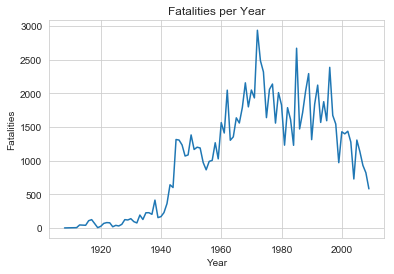

In [15]:
sns.set_style('whitegrid')
sns.lineplot(x='Year',y='Fatalities',data=Fatalities_per_year)
plt.title('Fatalities per Year')


### Fatalities v/s Survived v/s Killed on Ground

In [16]:
df['Survived']=df['Aboard']-df['Fatalities']
df['Survived'].fillna(0,inplace=True)

In [17]:
FSG_per_year=df[['Year','Aboard','Fatalities','Ground','Survived']].groupby('Year').sum()
FSG_per_year=FSG_per_year.reset_index()
FSG_per_year.columns=['Year','Aboard','Fatalities','Ground','Survived']
FSG_per_year.head()

,Year,Aboard,Fatalities,Ground,Survived
0,1908,2.0,1.0,0.0,1.0
1,1912,5.0,5.0,0.0,0.0
2,1913,51.0,45.0,0.0,6.0
3,1915,60.0,40.0,0.0,20.0
4,1916,109.0,108.0,0.0,1.0


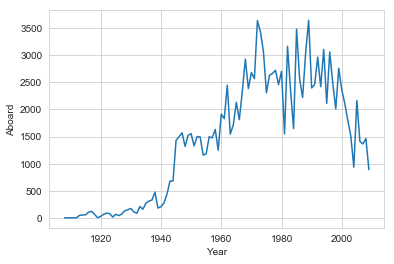

In [18]:
sns.lineplot(x='Year',y='Aboard',data=FSG_per_year)

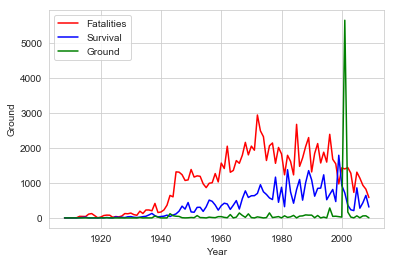

In [19]:
sns.lineplot(x='Year',y='Fatalities',data=FSG_per_year,color='red')
sns.lineplot(x='Year',y='Survived',data=FSG_per_year,color='blue')
sns.lineplot(x='Year',y='Ground',data=FSG_per_year,color='green')
plt.legend(['Fatalities','Survival','Ground'])

### Special Trends
From the above visualization we can see that the highest number of crashes occured between 1950s and 2000s which also leads to the high rate of fatalities in between these years.

In [20]:
from collections import Counter

## Worst Operators

In [21]:
operator_list=Counter(df['Operator']).most_common(10)
operators=[]
crashes=[]
for operator in operator_list:
    if 'Military' not in operator[0]:
        operators.append(operator[0])
        crashes.append(operator[1])
print('Top 10 worst operators')
pd.DataFrame({'Count of Crashes': crashes},index=operators)

Top 10 worst operators


,Count of Crashes
Aeroflot,179
Air France,70
Deutsche Lufthansa,65
China National Aviation Corporation,44
United Air Lines,44
Air Taxi,44
Pan American World Airways,41


## Most Dagerous Locations

In [22]:
location_list=Counter(df['Location'].dropna()).most_common(10)
locations=[]
crashes=[]
for location in location_list:
    locations.append(location[0])
    crashes.append(location[1])
print('Top 10 most dagerous locations')
pd.DataFrame({'Crashes in theis Location':crashes},index=locations)

Top 10 most dagerous locations


,Crashes in theis Location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


## Text Clustering with K-Means

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

dropping  all the rows in Summary with NaN values

In [24]:
summary_data=df['Summary'].dropna()
summary_data=pd.DataFrame(summary_data)
#for Reproducibility
random_state=0

KMeans normally works with numbers only: we need to have numbers.To get numbers, we do feature extraction.

The feature we’ll use is TF-IDF, a numerical statistic. This statistic uses term frequency and inverse document frequency. The method TfidfVectorizer() implements the TF-IDF algorithm.

In [25]:
documents=list(summary_data['Summary'])
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(documents)

### Model Fitting

In [26]:
model = MiniBatchKMeans(n_clusters=5, random_state=random_state)
model.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [27]:
model.cluster_centers_

array([[3.32853808e-04, 5.61597890e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.52139182e-04, 9.42550033e-03, 8.27526103e-05, ...,
        2.97713352e-04, 2.25400527e-04, 0.00000000e+00],
       [0.00000000e+00, 8.77272673e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.34328619e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.41261664e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [28]:
#predict cluster labels for new dataset
model.predict(X)
#to get cluster labels for the dataset used while training the model
#(used for models taht does not support predictions on new dataset)
model.labels_

array([1, 1, 1, ..., 1, 2, 0])

In [29]:
print('Most common Trems per Cluster: ')
order_centroids=model.cluster_centers_.argsort()[:,::-1]
#sort cluster centers by proximity to centroid
terms=vectorizer.get_feature_names()

for i in range(5):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most common Trems per Cluster: 


Cluster 0:
en
route
crashed
disappeared
mountain
plane
cargo
weather
flight
pilot


Cluster 1:
aircraft
approach
crashed
flight
pilot
weather
runway
mountain
conditions
struck


Cluster 2:
crashed
plane
taking
cargo
attempting
land
mountain
shortly
sea
fog


Cluster 3:
midair
collision
killed
aboard
dc
cessna
avoid
piper
air
mid


Cluster 4:
takeoff
engine
crashed
failure
shortly
plane
aircraft
lost
failed
runway


In [30]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

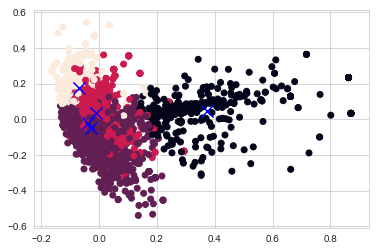

In [31]:
plt.scatter(reduced_features[:,0],reduced_features[:,1],c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [32]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["engine failure"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["terrorism"])
prediction = model.predict(Y)
print(prediction)



Prediction
[4]
[1]
